In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
df = pd.read_csv('city_day.csv')

# Preprocess the data
# Select relevant features and target (AQI)
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'City']
df = df[features + ['AQI']].dropna()  # Drop rows with missing values

# Encode categorical variable 'City'
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])

# Features and target
X = df[features].values
y = df['AQI'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))  # Hidden layer, input_dim=13 for 13 features
model.add(Dense(32, activation='relu'))  # Additional hidden layer
model.add(Dense(1))  # Output layer for regression (no activation for continuous output)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])  # Mean Absolute Error for interpretability


In [8]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 27921.5078 - mae: 139.6494 - val_loss: 19167.8594 - val_mae: 115.5714
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12916.3164 - mae: 92.0414 - val_loss: 4315.5244 - val_mae: 50.0571
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3680.9497 - mae: 44.5369 - val_loss: 2786.0032 - val_mae: 39.3049
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2430.5818 - mae: 35.5957 - val_loss: 1929.3712 - val_mae: 32.0378
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1779.1420 - mae: 29.7551 - val_loss: 1483.9576 - val_mae: 27.3573
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1357.4417 - mae: 25.6185 - val_loss: 1236.2251 - val_mae: 24.4959
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1307.0559 - mae: 24.2209 - val_loss: 1082.5225 - val_mae: 22.8660
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1025.8665 - mae: 21.7858 - val_loss: 983.6945 - val_m

In [9]:
# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {mae:.2f} AQI units')


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 542.2829 - mae: 16.1412
Test Mean Absolute Error: 15.65 AQI units


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


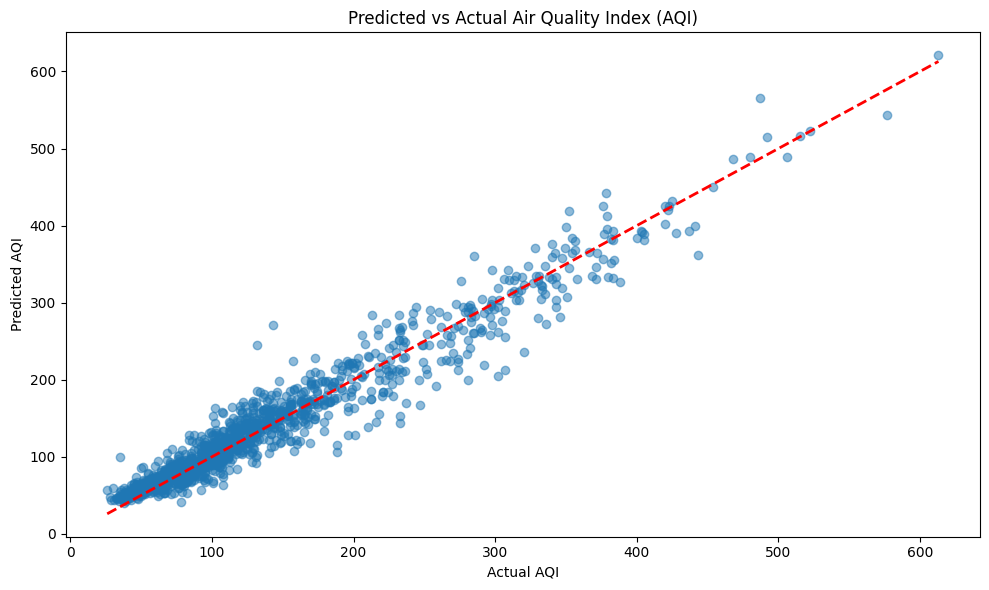

In [10]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Visualize predicted vs actual AQI
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual Air Quality Index (AQI)')
plt.tight_layout()
plt.show()

In [11]:
# Example prediction on a sample input
# Example: [PM2.5=50.0, PM10=80.0, NO=10.0, NO2=20.0, NOx=30.0, NH3=15.0, CO=0.5, SO2=5.0, O3=30.0, Benzene=1.0, Toluene=2.0, Xylene=0.5, City=Delhi (encoded)]
sample_input = np.array([[50.0, 80.0, 10.0, 20.0, 30.0, 15.0, 0.5, 5.0, 30.0, 1.0, 2.0, 0.5, le.transform(['Delhi'])[0]]])
sample_input_scaled = scaler.transform(sample_input)
prediction = model.predict(sample_input_scaled)
print(f'Predicted AQI: {prediction[0][0]:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted AQI: 108.74
